In [2]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [3]:
# configure face analysis
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='insightface_model',
                       providers=['CPUExecutionProvider'])

faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5)
# warning: don't set det_thresh < 0.3

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


### Extract Facial features and labels

In [4]:
import re

In [5]:
def clean_name(string):
    string = re.sub(r'[^A-Za-z]', ' ', string)
    string = string.title()
    return string

In [6]:
listdir = os.listdir(path='images')
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name)
    role  = clean_name(role)
    print('Role:', role, end='\t')
    print('Name:', name)

Role: Teacher	Name: Barack Obama
Role: Student	Name: Angelina Jolie
Role: Student	Name: Chris Evans
Role: Teacher	Name: Morgan Freeman
Role: Student	Name: Scarlett Johansson


In [7]:
person_info = []
listdir = os.listdir(path='images')
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    #print('Role =', role, end='\t')
    #print('Name =', name)

    # path of each image in respective folder
    img_files = os.listdir(path=f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'

        # step-1: read the image
        img_arr = cv2.imread(path)

        # step-2: get the info
        result = faceapp.get(img_arr, max_num=1)  # returns a list

        if len(result) > 0:
            # step-3: extract facial embedding
            res = result[0]
            embedding = res['embedding']

            # step-4: save all info - name, role, embedding in a list
            person_info.append([name, role, embedding])

In [8]:
dataframe = pd.DataFrame(person_info, columns=['Name', 'Role', 'Facial_Features'])
dataframe

,Name,Role,Facial_Features
0,Barack Obama,Teacher,"[0.8677794, -0.2674588, 0.07078117, -0.1440911..."
1,Barack Obama,Teacher,"[1.6962439, -0.9947778, -0.22458154, -1.749810..."
2,Barack Obama,Teacher,"[2.278046, -1.3973306, 1.5633776, -1.4799381, ..."
3,Barack Obama,Teacher,"[-0.06522348, 0.015305221, -0.8529637, -0.3290..."
4,Barack Obama,Teacher,"[0.33126727, -1.277368, 0.40080267, -1.3599609..."
5,Barack Obama,Teacher,"[1.410568, -0.41731393, -0.4466642, -1.4433608..."
6,Barack Obama,Teacher,"[1.604952, -0.24349296, 0.36104393, 0.04073026..."
7,Barack Obama,Teacher,"[0.5897459, 0.43560252, 0.35933083, -2.8032331..."
8,Barack Obama,Teacher,"[0.72280693, -0.9442276, -0.08723545, -2.40402..."
9,Barack Obama,Teacher,"[0.050016895, -0.49285138, -0.19506878, -1.122..."


## Predicting Person Name

### Step 1: Read Image

In [9]:
# Read test image
img_test = cv2.imread('test_images/test_2.jpeg')

# cv2.imshow('image', img_test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)

### Step 2: Extract Feature

In [10]:
res_test = faceapp.get(img_test, max_num=0)
for i, rt in enumerate(res_test):
    # print('current loop =', i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score'] * 100)
    embed_test = rt['embedding']

In [11]:
len(embed_test)

512

In [12]:
embed_test

array([-1.0785792 , -1.1072034 , -1.2359006 , -1.1190412 ,  1.6916196 ,
        1.2588973 , -0.42485118,  1.2528377 ,  1.9024427 ,  1.1879563 ,
       -2.245672  ,  2.0354257 , -0.16842383,  0.53057927,  0.3002857 ,
       -0.21257977,  0.30562732, -1.0242331 ,  0.2390659 ,  1.2245306 ,
       -0.31446567, -1.1225426 ,  2.4335976 ,  1.0288796 ,  0.61265826,
       -1.2186726 ,  1.4719696 , -0.37878817, -1.131981  ,  1.242806  ,
        1.1628733 ,  0.49313635,  0.9685552 ,  0.03850125,  0.4086311 ,
       -0.41302395,  0.01802629,  0.35701615,  0.9127355 , -0.1344508 ,
       -1.5695534 ,  1.4075115 ,  0.9529414 , -0.38528663,  0.0879333 ,
       -0.47209302, -0.20682615,  1.1180975 ,  0.775297  , -0.74925303,
       -2.0977914 ,  0.9927367 , -1.8607546 , -2.064167  , -0.88531   ,
       -0.03283212,  2.2557967 ,  0.2447021 , -0.39092302, -1.2569759 ,
       -0.822357  ,  0.22203101,  0.57044363,  0.37372676, -1.178931  ,
        0.8613459 ,  0.0827034 ,  0.71688426,  1.316746  ,  0.48

In [13]:
# Convert facial features to numpy array
X_list = dataframe['Facial_Features'].tolist()
X = np.asarray(X_list)

# Check shape of feature matrix
X.shape

(50, 512)

In [14]:
# Import pairwise distance metrics
from sklearn.metrics import pairwise

#### ML Search Algorithms

In [15]:
# Reshape the test embedding
y = embed_test.reshape(1, 512)  # 1 x 512

# Compute distance metrics
euclidean_distance = pairwise.euclidean_distances(X, y)
manhattan_distance = pairwise.manhattan_distances(X, y)
cosine_similar = pairwise.cosine_similarity(X, y)

In [16]:
data_search = dataframe.copy()
data_search['euclidean'] = euclidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [17]:
data_search

,Name,Role,Facial_Features,euclidean,manhattan,cosine
0,Barack Obama,Teacher,"[0.8677794, -0.2674588, 0.07078117, -0.1440911...",35.685886,644.640395,-0.095822
1,Barack Obama,Teacher,"[1.6962439, -0.9947778, -0.22458154, -1.749810...",32.883686,589.927729,-0.134573
2,Barack Obama,Teacher,"[2.278046, -1.3973306, 1.5633776, -1.4799381, ...",34.865646,639.159709,-0.094100
3,Barack Obama,Teacher,"[-0.06522348, 0.015305221, -0.8529637, -0.3290...",36.929600,662.522183,-0.070027
4,Barack Obama,Teacher,"[0.33126727, -1.277368, 0.40080267, -1.3599609...",34.171711,614.047468,-0.008367
5,Barack Obama,Teacher,"[1.410568, -0.41731393, -0.4466642, -1.4433608...",35.303631,656.479713,-0.074950
6,Barack Obama,Teacher,"[1.604952, -0.24349296, 0.36104393, 0.04073026...",35.881924,654.347296,-0.074587
7,Barack Obama,Teacher,"[0.5897459, 0.43560252, 0.35933083, -2.8032331...",34.694302,634.587900,-0.084586
8,Barack Obama,Teacher,"[0.72280693, -0.9442276, -0.08723545, -2.40402...",35.140877,637.131496,-0.034437
9,Barack Obama,Teacher,"[0.050016895, -0.49285138, -0.19506878, -1.122...",33.291786,599.762519,-0.031153


In [18]:
import matplotlib.pyplot as plt

### Step 3: Calculate similarity matrix

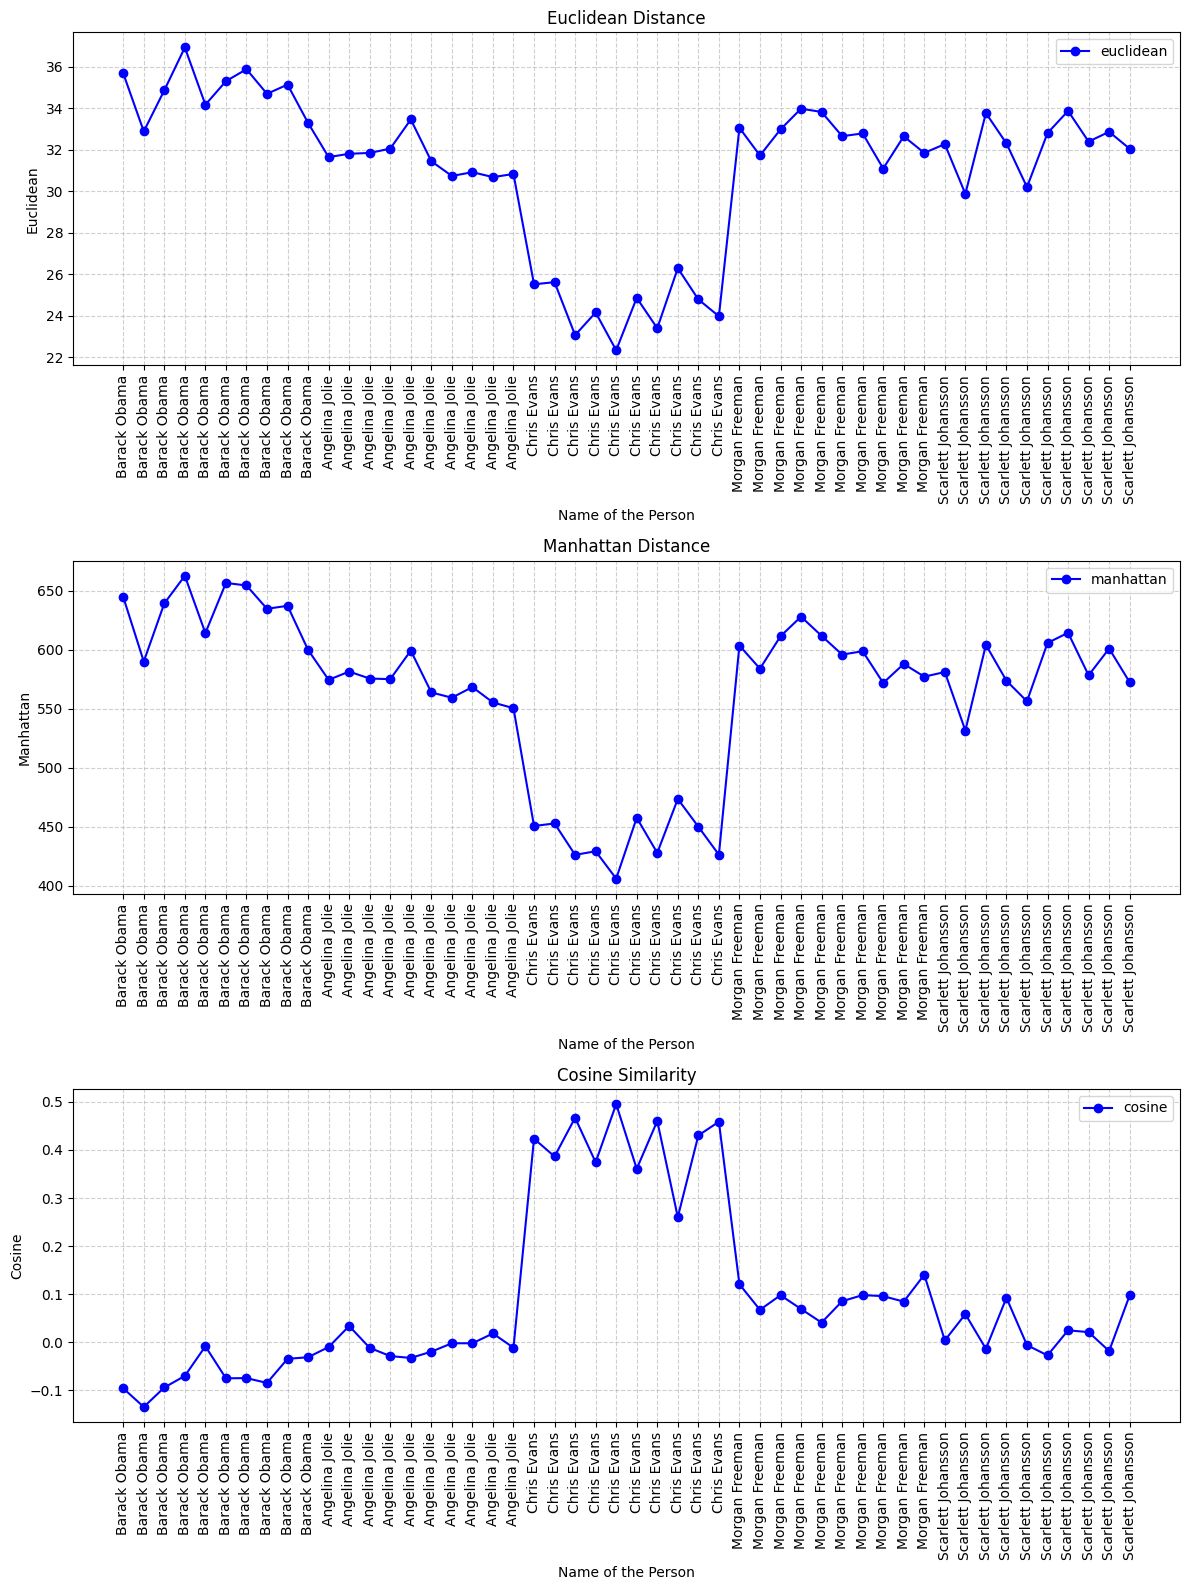

In [19]:
# Create figure with adjusted size
plt.figure(figsize=(12, 16))

# Define similarity metrics for plotting
metrics = ['euclidean', 'manhattan', 'cosine']
titles = ['Euclidean Distance', 'Manhattan Distance', 'Cosine Similarity']

# Loop through each metric and create a subplot
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 1, i)  # 3 rows, 1 column, subplot index i
    plt.plot(data_search[metric], marker='o', linestyle='-', label=metric, color='b')
    
    plt.xticks(
        ticks=range(len(data_search[metric])),
        labels=data_search['Name'],
        rotation=90
    )
    
    plt.xlabel('Name of the Person', fontsize=10)
    plt.ylabel(metric.capitalize(), fontsize=10)
    plt.title(titles[i-1], fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

# Adjust layout to prevent label overlap
plt.tight_layout()
plt.show()


#### Identify person name using Euclidean Distance

In [20]:
# Define threshold for optimal Euclidean distance
d_eq_optimal = 25

# Filter dataset based on Euclidean distance threshold
datafilter = data_search.query(f'euclidean < {d_eq_optimal}')
datafilter.reset_index(drop=True, inplace=True)

In [21]:
datafilter

,Name,Role,Facial_Features,euclidean,manhattan,cosine
0,Chris Evans,Student,"[1.31089, -2.0901515, -1.0369687, -1.7980306, ...",23.064419,426.207777,0.466914
1,Chris Evans,Student,"[0.9705932, -1.7571974, -1.310451, -1.0260838,...",24.156776,429.258629,0.374402
2,Chris Evans,Student,"[0.59106547, -1.4146674, -0.6717277, -1.310447...",22.333603,406.088496,0.495306
3,Chris Evans,Student,"[-1.1616048, -0.6850084, -0.4388067, -2.877142...",24.859669,457.608144,0.360777
4,Chris Evans,Student,"[0.35467637, -0.6975621, -0.30049777, -1.91148...",23.396021,427.879582,0.460184
5,Chris Evans,Student,"[0.44940907, -1.631388, -0.950971, -1.5428777,...",24.786196,450.061264,0.430181
6,Chris Evans,Student,"[0.8588297, -1.1002791, -0.7700386, -1.4917799...",23.973585,426.329190,0.458683


In [22]:
# If match exists
if len(datafilter) > 0:
    argmin = datafilter['euclidean'].argmin()
    name, role = datafilter.loc[argmin][['Name', 'Role']]
else:
    name = 'Unknown'
    role = 'Unknown'

print(name, role)

Chris Evans Student


#### Identify person name using Manhattan Distance

In [23]:
d_man_optimal = 450

datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True, inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    name_man, role_man = datafilter.loc[argmin][['Name', 'Role']]
else:
    name_man = 'Unknown'
    role_man = 'Unknown'

print(name, role)

Chris Evans Student


#### Identify person name using Cosine Similarity

In [24]:
S_opt = 0.4

datafilter = data_search.query(f'cosine > {S_opt}')
datafilter.reset_index(drop=True, inplace=True)

if len(datafilter) > 0:
    argmax = datafilter['cosine'].argmax()
    name_cos, role_cos = datafilter.loc[argmax][['Name', 'Role']]
else:
    name_cos = 'Unknown'
    role_cos = 'Unknown'

print(name_cos, role_cos)

Chris Evans Student


# Identify Multiple Person's in an Image

In [25]:
def ml_search_algorithm(dataframe, feature_column, test_vector, name_role=['Name', 'Role'], thresh=0.5):
    """
    Cosine similarity based search algorithm
    """

    # step-1: take the dataframe (collection of data)
    dataframe = dataframe.copy()

    # step-2: Index face embedding from the dataframe and convert into array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)

    # step-3: Calculate cosine similarity
    similar = pairwise.cosine_similarity(x, test_vector.reshape(1, -1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr

    # step-4: filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        # step-5: get the person name
        data_filter.reset_index(drop=True, inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'
  
    return person_name, person_role

In [26]:
test_image = cv2.imread('test_images/test_10.jpg')

# cv2.imshow('image', test_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)

In [27]:
# step-1: take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()

# step-2: use for loop and extract each embedding and pass to ml_search_algorithm
for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe,
                                                   'Facial_Features',
                                                   test_vector=embeddings,
                                                   name_role=['Name', 'Role'],
                                                   thresh=0.5)
    
    # print(person_name, person_role)

    if person_name == 'Unknown':
        color = (0, 0, 255)  # BGR (Red for unknown)
    else:
        color = (0, 255, 0)  # BGR (Green for recognized)

    cv2.rectangle(test_copy, (x1, y1), (x2, y2), color)

    text_gen = person_name
    cv2.putText(test_copy, text_gen, (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 0.5, color, 2)

cv2.imshow('test image', test_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


2025-01-28 15:11:06.017 Python[48459:107463527] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-28 15:11:06.017 Python[48459:107463527] +[IMKInputSession subclass]: chose IMKInputSession_Modern


-1

# Compressing Dataset

In [28]:
dataframe

,Name,Role,Facial_Features
0,Barack Obama,Teacher,"[0.8677794, -0.2674588, 0.07078117, -0.1440911..."
1,Barack Obama,Teacher,"[1.6962439, -0.9947778, -0.22458154, -1.749810..."
2,Barack Obama,Teacher,"[2.278046, -1.3973306, 1.5633776, -1.4799381, ..."
3,Barack Obama,Teacher,"[-0.06522348, 0.015305221, -0.8529637, -0.3290..."
4,Barack Obama,Teacher,"[0.33126727, -1.277368, 0.40080267, -1.3599609..."
5,Barack Obama,Teacher,"[1.410568, -0.41731393, -0.4466642, -1.4433608..."
6,Barack Obama,Teacher,"[1.604952, -0.24349296, 0.36104393, 0.04073026..."
7,Barack Obama,Teacher,"[0.5897459, 0.43560252, 0.35933083, -2.8032331..."
8,Barack Obama,Teacher,"[0.72280693, -0.9442276, -0.08723545, -2.40402..."
9,Barack Obama,Teacher,"[0.050016895, -0.49285138, -0.19506878, -1.122..."


In [29]:
dataframe_compress = dataframe.groupby(by=['Name', 'Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43231916427612305, 1.0750129699707032, -0.1..."
1,Barack Obama,Teacher,"[0.9486202239990235, -0.5583913326263428, 0.09..."
2,Chris Evans,Student,"[0.7201780319213867, -1.4683103561401367, -0.7..."
3,Morgan Freeman,Teacher,"[0.48572502136230467, -0.6195638179779053, -0...."
4,Scarlett Johansson,Student,"[0.19124267101287842, -0.4888328552246094, -1...."


## Save the Data

### Convert dataframe into array and save in numpy zip format

In [30]:
# Convert dataframe into array and save in numpy zip format
xvalues = dataframe_compress.values

col_name = np.array(dataframe_compress.columns)
col_name

np.savez('dataframe_students_teacher.npz', xvalues, col_name)

### Load the numpy zip

In [31]:
# Load the numpy zip
file_np = np.load('dataframe_students_teacher.npz', allow_pickle=True)
file_np.files

pd.DataFrame(file_np['arr_0'], columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43231916427612305, 1.0750129699707032, -0.1..."
1,Barack Obama,Teacher,"[0.9486202239990235, -0.5583913326263428, 0.09..."
2,Chris Evans,Student,"[0.7201780319213867, -1.4683103561401367, -0.7..."
3,Morgan Freeman,Teacher,"[0.48572502136230467, -0.6195638179779053, -0...."
4,Scarlett Johansson,Student,"[0.19124267101287842, -0.4888328552246094, -1...."
